In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 읽기
heptathlon = pd.read_csv("c:/data/mva/heptathlon.csv")
heptathlon.head()

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),12.69,1.86,15.80,22.56,7.27,45.66,128.51,7291
1,John (GDR),12.85,1.80,16.23,23.65,6.71,42.56,126.12,6897
2,Behmer (GDR),13.20,1.83,14.20,23.10,6.68,44.54,124.20,6858


In [5]:
# 기술통계량 구하기(소수점 이하 2자리 반올림 표시)
round(heptathlon.describe(), 2)

,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
count,25.00,25.00,25.00,25.00,25.00,25.00,25.00,25.00
mean,13.84,1.78,13.12,24.65,6.15,41.48,136.05,6090.60
std,0.74,0.08,1.49,0.97,0.47,3.55,8.29,568.47
min,12.69,1.50,10.00,22.56,4.88,35.68,124.20,4566.00
25%,13.47,1.77,12.32,23.92,6.05,39.06,132.24,5746.00
50%,13.75,1.80,12.88,24.83,6.25,40.28,134.74,6137.00
75%,14.07,1.83,14.20,25.23,6.37,44.54,138.48,6351.00
max,16.42,1.86,16.23,26.61,7.27,47.50,163.43,7291.00


In [6]:
# 변수변환: hurdles, run200m, run800m은 작은 값일수록 좋은 점수이기 때문에 높은 수가 좋은 점수가 되도록 (최댓값 - 변숫값)으로 변환
heptathlon.hurdles = np.max(heptathlon.hurdles) - heptathlon.hurdles
heptathlon.run200m = np.max(heptathlon.run200m) - heptathlon.run200m
heptathlon.run800m = np.max(heptathlon.run800m) - heptathlon.run800m
heptathlon.head()

,Unnamed: 0,hurdles,highjump,shot,run200m,longjump,javelin,run800m,score
0,Joyner-Kersee (USA),3.73,1.86,15.80,4.05,7.27,45.66,34.92,7291
1,John (GDR),3.57,1.80,16.23,2.96,6.71,42.56,37.31,6897
2,Behmer (GDR),3.22,1.83,14.20,3.51,6.68,44.54,39.23,6858
3,Sablovskaite (URS),2.81,1.80,15.23,2.69,6.25,42.78,31.19,6540
4,Choubenkova (URS),2.91,1.74,14.76,2.68,6.32,47.46,35.53,6540


In [9]:
# 분석변수 선택하기
feature = ['hurdles','highjump','shot','run200m','longjump','javelin','run800m']
hep_data = heptathlon[feature]
# hep_data = heptathlon.iloc{:, 1:8]
# hep_data = heptathlon.iloc{:, 1:-1]

In [10]:
# 변수 표준화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(hep_data)

In [12]:
# 초기 주성분분석
from sklearn.decomposition import PCA
pca_init = PCA(n_components=len(hep_data.columns))
pca_init.fit(x)
pca_init.explained_variance_ #주성분의 분산값이 R 결과값과 다름

array([4.64611996, 1.24408391, 0.54272305, 0.47621544, 0.25548619,
       0.0759954 , 0.05104272])

In [14]:
# 주성분 분산의 합: 7이 나와야 하는데 7.29xxx 으로 주성분 분석이 불안정
np.sum(pca_init.explained_variance_)

7.291666666666666

In [21]:
# 누적분산 비율: R 결과값과 동일
np.cumsum(pca_init.explained_variance_ratio_)

array([0.63718217, 0.80779939, 0.88222998, 0.94753952, 0.98257763,
       0.99299986, 1.        ])

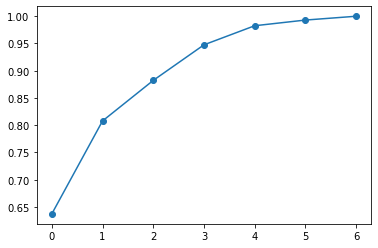

In [22]:
# 누적분산 그림
plt.plot(np.cumsum(pca_init.explained_variance_ratio_), 'o-')
plt.show()

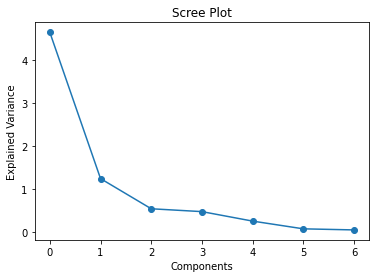

In [18]:
# 스크리 그림
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.plot(pca_init.explained_variance_, 'o-')
plt.show()

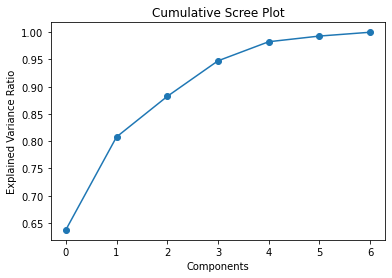

In [19]:
# 누적 스크리 그림
plt.title('Cumulative Scree Plot')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.plot(np.cumsum(pca_init.explained_variance_ratio_), 'o-')
plt.show()

In [24]:
# 주성분 분석: 주성분 수 2개 추출
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
hep_pca = pca.fit_transform(x)
# 주성분 분산
pca.explained_variance_

array([4.64611996, 1.24408391])

In [25]:
# 주성분 분산 비율
pca.explained_variance_ratio_

array([0.63718217, 0.17061722])

In [26]:
# 주성분 계수
np.round(pca.components_, 3)

array([[-0.453, -0.377, -0.363, -0.408, -0.456, -0.075, -0.375],
       [-0.158, -0.248,  0.289,  0.26 , -0.056,  0.842, -0.224]])

In [27]:
# 주성분 점수
hep_pca[0:5,:]

array([[-4.20643487,  1.26802363],
       [-2.9416187 ,  0.53452561],
       [-2.70427114,  0.69275901],
       [-1.37105209,  0.70655862],
       [-1.38704979,  1.78931718]])